# MCS 275 Spring 2023 Worksheet 10 Solutions

* Course instructor: David Dumas
* Contributors to this document: David Dumas, Kylash Viswanathan   

## Topics

This worksheet is about `numpy`.

## Resources

These things might be helpful while working on the problems.  Remember that for worksheets,  we don't strictly limit what resources you can consult, so these are only suggestions.

* [VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/):
    * Chapter 2 covers numpy
* [Course sample code repo](https://github.com/daviddumas/mcs275spring2023/blob/main/samplecode/)
* [Lecture 22 - numpy](http://dumas.io/teaching/2023/spring/mcs275/slides/lecture22.html)
* [Lecture 23 - numpy 2](http://dumas.io/teaching/2023/spring/mcs275/slides/lecture23.html)
* [Lecture 24 - Julia sets](http://dumas.io/teaching/2023/spring/mcs275/slides/lecture24.html)
* [Downey's book](https://greenteapress.com/thinkpython2/html/)

## Notebook recommended

I think you'll have the best experience with this worksheet if you do  your work in a Python notebook.

Also, remember to install `numpy` (and `pillow`, if you haven't already).  For most people thse commands will do it:
```text
python3 -m pip install numpy
python3 -m pip install pillow
```

## 1. Generate these arrays

Try to find concise expressions that generate these numpy arrays, without using explicit loops and without listing all the elements out as literals.

### A.
```
array([  4,   9,  16,  25,  36,  49,  64,  81, 100, 121])
```


### B.
```
array([ 0.2,  0.4,  0.6, -5. , -5. , -5. , -5. , -5. ,  1.8,  2. ,  2.2, 2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6])
```
### C.
```
array([[4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.]])
```


### D.
```
array([[7, 0, 7, 7, 7, 7, 7, 7, 0, 7],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [7, 0, 7, 7, 7, 7, 7, 7, 0, 7],
       [7, 0, 7, 7, 7, 7, 7, 7, 0, 7],
       [7, 0, 7, 7, 7, 7, 7, 7, 0, 7],
       [7, 0, 7, 7, 7, 7, 7, 7, 0, 7],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [7, 0, 7, 7, 7, 7, 7, 7, 0, 7]])
```

## Solutions

### A.

In [1]:
import numpy as np
A = np.array([i**2 for i in range(2,12)])
A

array([  4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

### B.

In [2]:
B = np.arange(0.2,3.8,0.2)
B[3:8] = -5
B

array([ 0.2,  0.4,  0.6, -5. , -5. , -5. , -5. , -5. ,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6])

### C.

In [3]:
C = np.abs(np.zeros((7,9)) + np.arange(-4,5))
C

array([[4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4.]])

### D.

In [4]:
D = np.full((8,10),7,dtype="int64")
D[1]=0
D[-2]=0
D[:,1]=0
D[:,-2]=0
D

array([[7, 0, 7, 7, 7, 7, 7, 7, 0, 7],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [7, 0, 7, 7, 7, 7, 7, 7, 0, 7],
       [7, 0, 7, 7, 7, 7, 7, 7, 0, 7],
       [7, 0, 7, 7, 7, 7, 7, 7, 0, 7],
       [7, 0, 7, 7, 7, 7, 7, 7, 0, 7],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [7, 0, 7, 7, 7, 7, 7, 7, 0, 7]])

## 2. Numpy image processing

Here is a grayscale photograph of an onion sitting on a wooden desk.

* [ws10_grayscale_onion.png](ws10_grayscale_onion.png)

![](images/ws10_grayscale_onion.png)

In this problem, you'll work with the data from this image using numpy.  Last week, you did some image processing using `.getpixel` and `.putpixel` from Pillow, but converting the image to a numpy array and then analyzing the data using numpy is really a better approach in most cases.

Here are two functions that will help with that: One loads a PNG image into a numpy array.  It requires numpy and PIL.  If the PNG image is grayscale, you'll get a 2-dimensional array whose dtype is `uint8`.  The other saves a 2-dimension numpy array with dtype `uint8` as a PNG image.

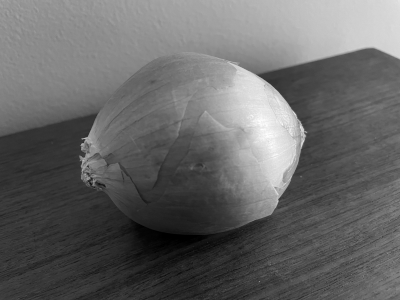

In [74]:
import PIL.Image
import numpy as np

def load_image_to_array(fn):
    "Open image file with name `fn` and return as a numpy array`"
    img = PIL.Image.open(fn)
    return np.array(img)

def save_array_to_image(fn,A):
    "Save 2D array `A` with dtype `uint8` to file named `fn`"
    assert A.ndim == 2
    assert A.dtype == np.dtype("uint8")
    img = PIL.Image.fromarray(A)
    img.save(fn)

### A. Peak onion

What row of the image has the largest average brightness?

What column has the largest average brightness?

What is the brightest color that appears in the image?  Where does it appear?

## Solution

In [106]:
# load the image, and obtain the dimensions.
from PIL import Image
onion = load_image_to_array("ws10_grayscale_onion.png")
im = Image.open('ws10_grayscale_onion.png')
width,height = im.size

### Row with the largest average brightness:

In [136]:
row_means = np.mean(onion, axis = 1) # obtains the means of the rows
row_means.ravel() #flattens the row means
np.where(row_means.ravel() == np.max(row_means))

(array([0]),)

### Column with the largest average brightness

In [108]:
col_means = np.mean(onion, axis = 0) # obtains the means of the columns
col_means.ravel() # flattens the column means
np.where(col_means.ravel() == np.max(col_means))[0]

array([270])

### Brightest color that appears in the image and Location

In [140]:
# Obtain index of maximium value
index = np.argmax(onion)
# Obtain the corresponding row and column
max_row = np.argmax(onion) // width
max_col = np.argmax(onion) % height
print("Indices of brightest color", max_row,max_col)
print("Brightest color", onion[max_row][max_col])
#Confirm that this is the true maximum
onion[max_row][max_col] == onion.ravel()[index]

Indices of brightest color 123 259
Brightest color 254


True

### B. Horizontal average

Create a new grayscale image file `ws10_grayscale_onion_colavg.png` with the same dimensions as the original image, but where each column is filled with a solid color that is as close as possible to the average brightness of the coresponding column of the original image.  The result should look like this:
![](images/ws10_grayscale_onion_colavg.png)

**Hint:** If you have an array of floats you can convert them to an array of `uint8` values using the method call `.astype("uint8")`.

## Solution

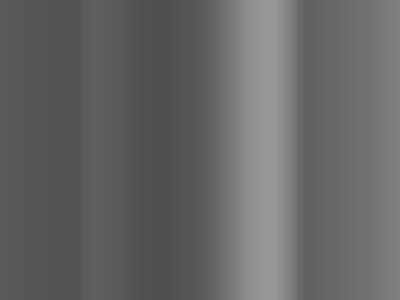

In [124]:
A = np.zeros((height, width), dtype= "uint8")
for x in range(height):
    for y in range(width):
        A[x][y] = col_means.ravel()[y].astype("uint8")
save_array_to_image("ws10_grayscale_onion_colavg.png",A.astype("uint8"))
PIL.Image.fromarray(A.astype("uint8"))

### C. Vertical average

Create a new grayscale image file `ws10_grayscale_onion_rowavg.png` with the same dimensions as the original image, but where each row is filled with a solid color that is as close as possible to the average brightness of the coresponding row of the original image.  The result should look like this:
![](images/ws10_grayscale_onion_rowavg.png)

## Solution

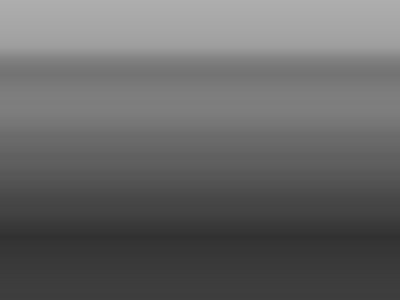

In [123]:
A = np.zeros((height, width), dtype= "uint8")
for y in range(width):
    for x in range(height):
        A[x][y] = row_means.ravel()[x].astype("uint8")
save_array_to_image("ws10_grayscale_onion_rowavg.png",A.astype("uint8"))
PIL.Image.fromarray(A.astype("uint8"))

### D. Gamma adjust

If you divide a grayscale image array by $255.0$, you get an array of floats between $0.0$ and $1.0$.  If you raise those floats to a power $\gamma$ (usually chosen to be near $1$) and then multiply by $255.0$ again, the resulting image will be "gamma adjusted" by exponent $\gamma$.  Of course if $\gamma=1$ you just get the original image back again.

Apply this process to the onion photo with for each of these values of $\gamma$:
* 0.25
* 0.7
* 1.0
* 1.2
* 1.4
* 2
* 5

How would you explain the qualitative effect of changing $\gamma$?

## Solution

The exponent below can be adjusted to change $\gamma$. Note that $\gamma=2$ as shown below. The effect of $\gamma$ is to e
emphasize contrasts in the image

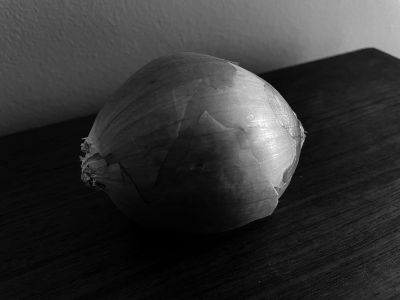

In [122]:
PIL.Image.fromarray((((onion/255.0)**2)*255.0).astype("uint8"))

## 3. Riemann Sum

The area under one "hump" of the sine function is exactly 2, i.e.
$$
\int_0^\pi \sin(x) \, dx = 2
$$

For any positive integer `n`, that integral can be approximated by dividing the interval $[0,\pi]$ into `n` equal parts and forming a left-endpoint Riemann sum, whereby the area is approximated by a union of `n` rectangles.  This is shown below for `n=12`:

![](images/ws10_riemann.png)

Here's a function that computes the Riemann sum naively, using Python for loops:

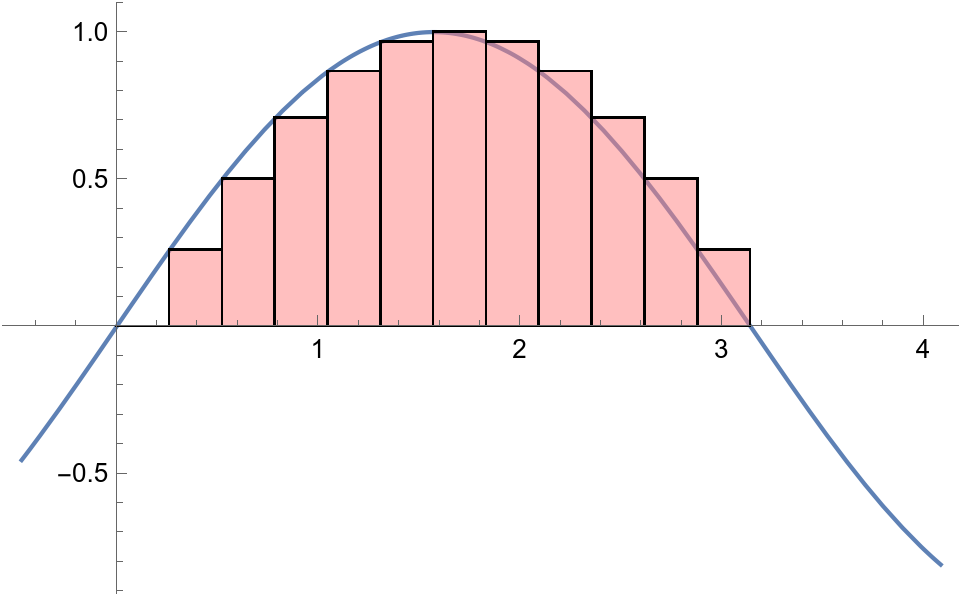

In [127]:
import math
import time
def naive_rs(n):
    """
    Riemann sum for sin(x) on [0,pi] computed without numpy
    and without any concern for accumulating errors when you
    sum many small floats. (TODO: Learn numerical analysis!)
    """
    hsum = 0.0
    for i in range(n):
        hsum += math.sin(math.pi*(i/n)) # Add a rectangle height
    return hsum * (math.pi/n) # Multiply sum of heights by width

As we can see, the return value gets quite close to 2 as we increase `n`.

In [128]:
naive_rs(3)

1.8137993642342178

In [129]:
naive_rs(5)

1.933765598092805

In [130]:
naive_rs(5_000_000)

1.999999999999953

However, for large values of `n` this function is quite slow.  (Try `n=5_000_000` or `n=20_000_000` for example.)

Write a function `numpy_rs(n)` that makes an equivalent computation using numpy to avoid explicit iteration.

Check that `numpy_rs(n)` and `naive_rs(n)` return values that are extremely close for small values of `n`.  (They can't be expected to necessarily agree exactly, as floating point addition is not associative.)

Then compare the speed of `numpy_rs(n)` and `naive_rs(n)` for large values of `n`.  (For this problem, let's say a value of `n` is "large" if the slower of the two calculations takes at least half a second.)

**Hints**: You won't need the `math` module at all in the numpy solution.  There's a constant called `np.pi` that is equal to $\pi$.  The solution won't contain any loops.

### Solution

In [131]:
def numpy_rs(n):
    "Riemann sum for sin(x) on [0,pi] with numpy"
    return np.sum(np.sin(np.pi*np.linspace(0,1,n+1)))*np.pi/n

In [132]:
# Implementation of numpy's integration via Riemann Sums
t0 = time.time()
numpy_rs(5_000_000)
print(time.time()-t0)

0.12428903579711914


In [133]:
# Implementation of naive integration via Riemann Sums
t0 = time.time()
naive_rs(5_000_000)
print(time.time()-t0)

0.8508999347686768


For a moderately sized integration, the numpy version performs nearly 7 times faster

## Extra challenge

If you have extra time: Generalize `numpy_rs(n)` to a function `numpy_rs(f,a,b,n)` which takes a function `f`, interval endpoints `a` and `b`, and a number of rectangles `n`, and computes the Riemann sum approximation of $\int_a^b f(x) \,dx$ using `numpy`.  Assume `f` is a numpy `ufunc`, so it can be applied directly to an array.

### Revision history

* 2023-03-14 - Initial publication